In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import gzip
import pickle
import time

%matplotlib inline
import matplotlib

from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
import warnings
warnings.filterwarnings("ignore")

(84, 144) (84,)


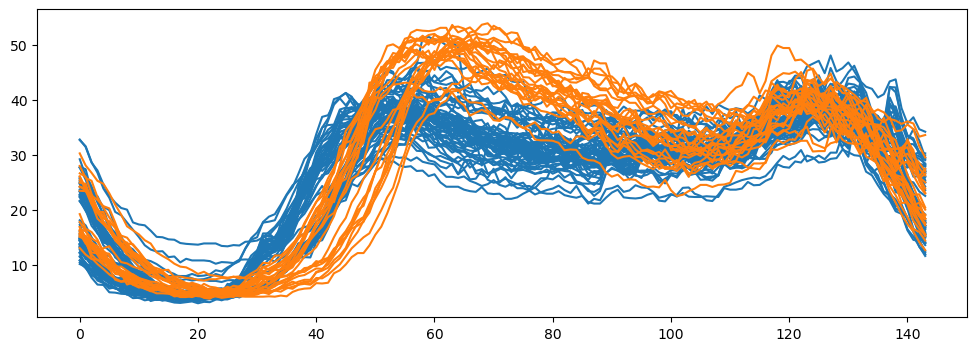

In [3]:
# Dataset 0

df = pd.read_csv('water_consumption_profiles.csv')
df['date'] = df['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df = df.set_index('date')
df_ = df.groupby([df.index.month, df.index.weekday]).mean()
X = df_.values
y = df_.reset_index([1])['date'].map(lambda x: 0 if x < 5 else 1).values
N = len(y)

print(X.shape, y.shape)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

# plt.figure(figsize=(12, 4))
# # plt.plot(X.T, 'k')
# plt.plot(X[y == 0, :][:1,:].T, '#1F77B4')
# plt.plot(X[y == 1, :][:1,:].T, '#FF7F0E')
# plt.show()

In [4]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65*N):].copy()
train_indices = shuffled_indices_[:int(0.65*N)].copy()

X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54, 144) (54,)
(30, 144) (30,)


### k-means  aggregated

In [5]:
t = time.time()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(time.time() - t)

0.11205101013183594


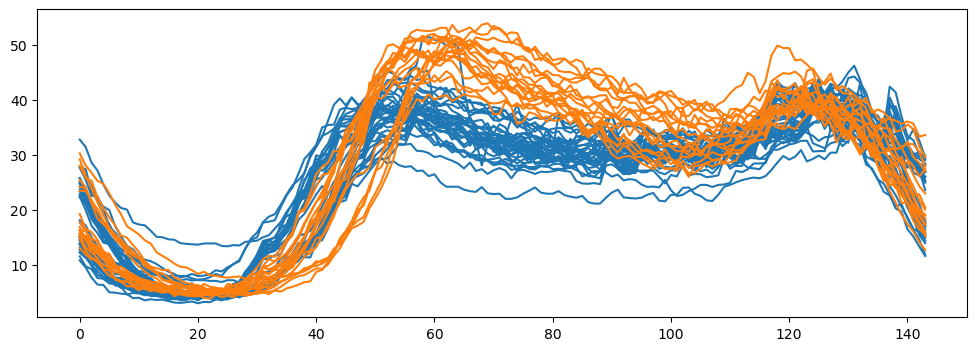

In [6]:
labels = kmeans.predict(X_train)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()


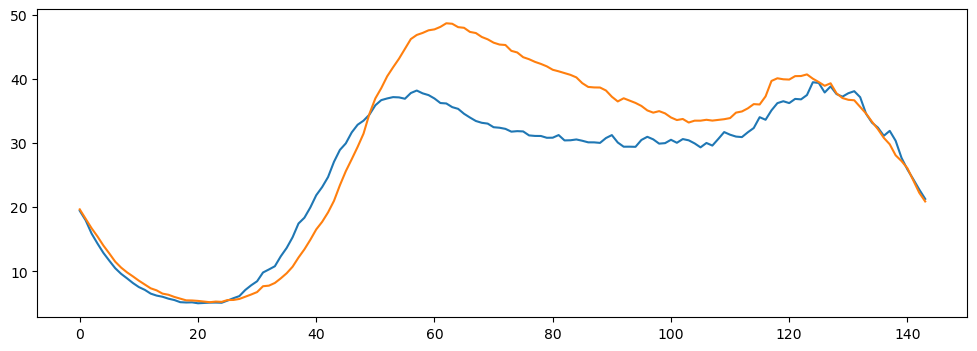

In [7]:
plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.show()

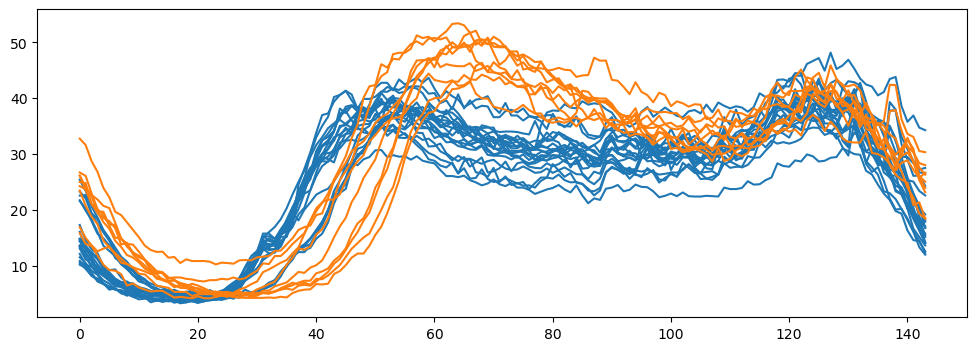

In [8]:
labels = kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

### DBA k-means aggregated

In [9]:
t = time.time()
tskmeans = TimeSeriesKMeans(n_clusters=2, metric='dtw', max_iter_barycenter=100, n_init=5)
tskmeans.fit(X_train)
print(time.time() - t)

10.437660217285156


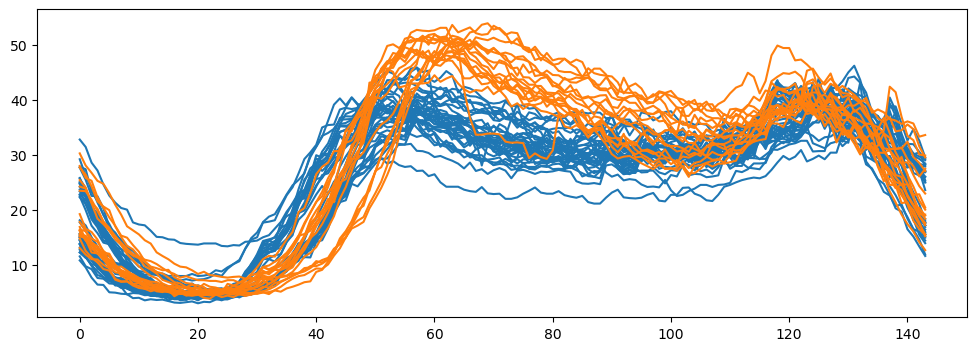

In [10]:
labels = tskmeans.predict(X_train)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()

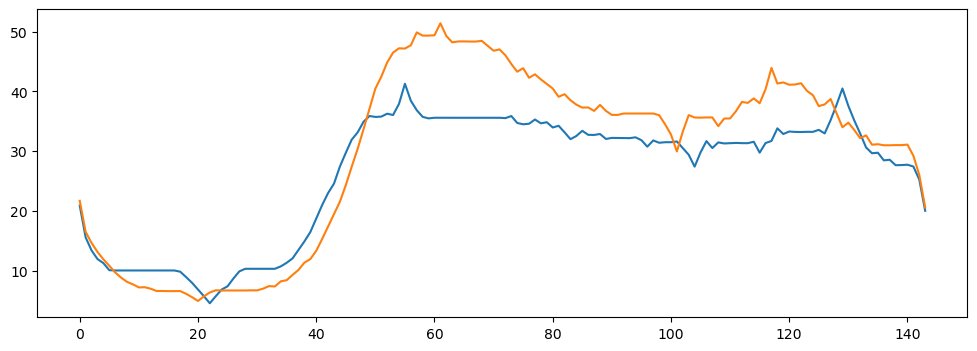

In [12]:
plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(tskmeans.cluster_centers_[0, :, 0].T, '#1F77B4')
plt.plot(tskmeans.cluster_centers_[1, :, 0].T, '#FF7F0E')
plt.show()

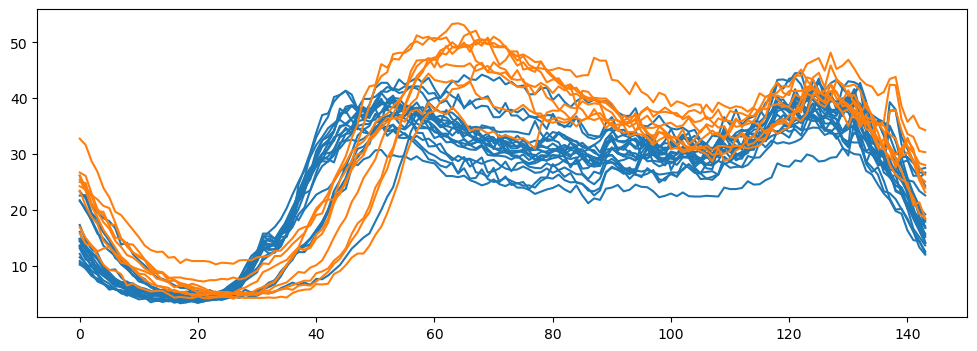

In [13]:
labels = tskmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

## non-aggregated data 651ts

(651, 144) (651,)


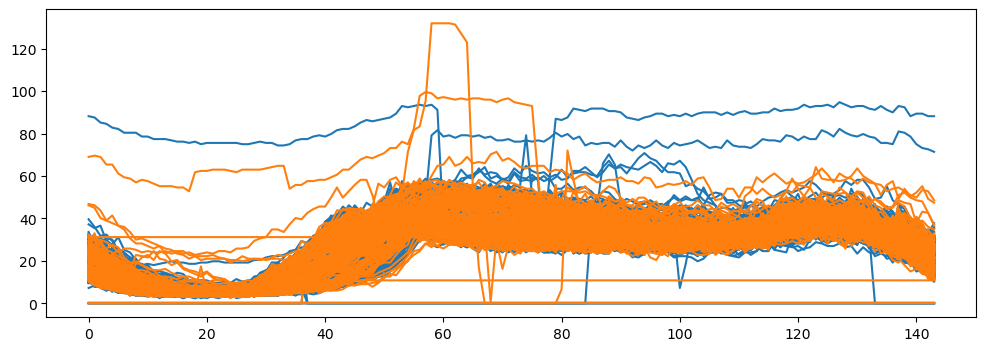

In [14]:
df_cp = pd.read_csv('water_consumption_profiles.csv')
df_cp['date'] = df_cp['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df_cp['day'] = df_cp['date'].dt.day
X = df_cp.drop(['date','day'],axis=1).values
y = df_cp.reset_index()['day'].map(lambda x:1 if x in [1,2,3,11,12,13,21,22,23] else 0).values
N = len(y)
print(X.shape, y.shape)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

In [15]:

shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65*N):].copy()
train_indices = shuffled_indices_[:int(0.65*N)].copy()

X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

print( X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(423, 144) (423,)
(228, 144) (228,)


### k-means non-aggregated

0.05754804611206055


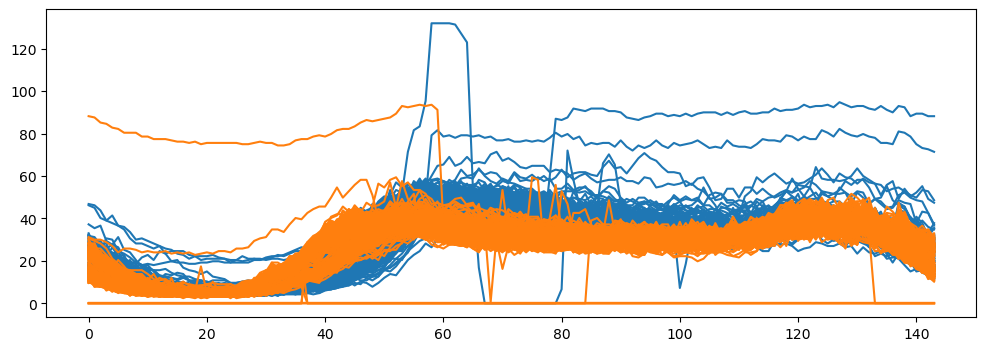

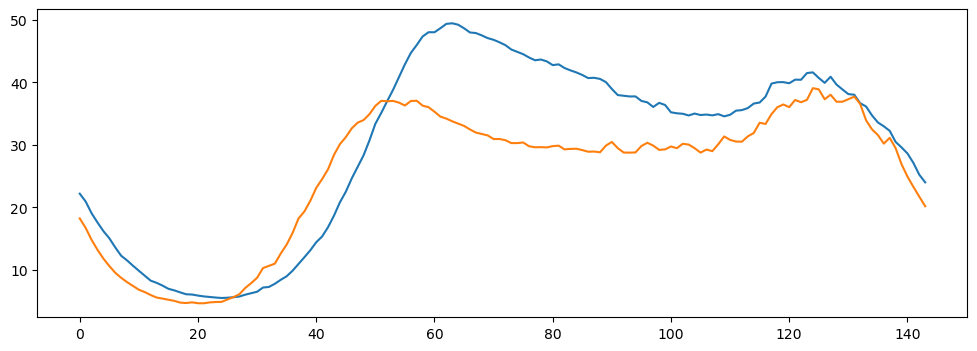

In [16]:
t = time.time()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(time.time() - t)

labels = kmeans.predict(X_train)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.show()

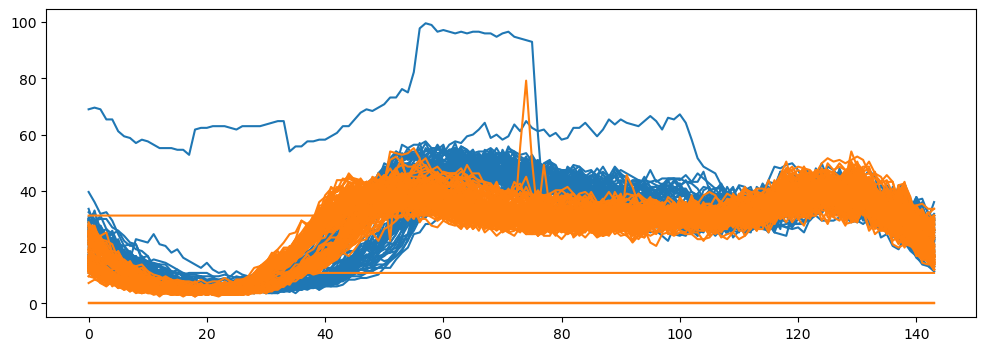

In [17]:
labels = kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

### DBA-k-means non-aggregated


In [20]:
t = time.time()

tskmeans = TimeSeriesKMeans(n_clusters=2, metric='dtw', max_iter_barycenter=100, n_init=5)
tskmeans.fit(X_train)

print(time.time() - t)

labels = tskmeans.predict(X_test)

# plt.figure(figsize=(12, 4))
# # plt.plot(X.T, 'k')
# plt.plot(X_train[labels == 0, :].T, '#1F77B4')
# plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
# plt.show()

82.53714895248413


In [206]:
confusion_matrix(y_train, labels)


array([[289,   4],
       [126,   4]])

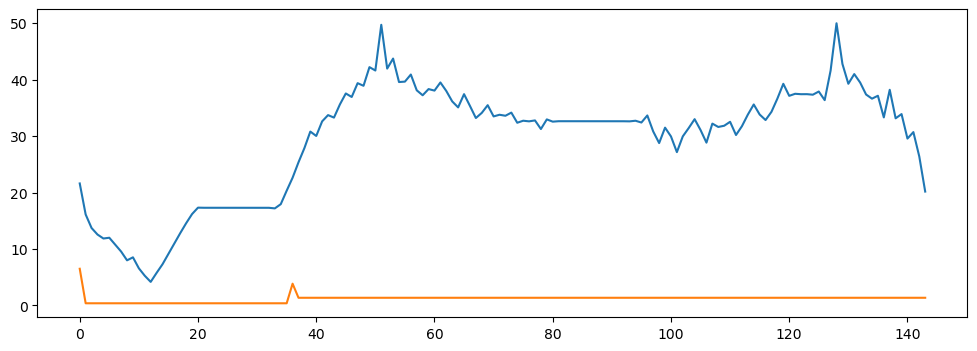

In [207]:
plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(tskmeans.cluster_centers_[0, :, 0].T, '#1F77B4')
plt.plot(tskmeans.cluster_centers_[1, :, 0].T, '#FF7F0E')
plt.show()

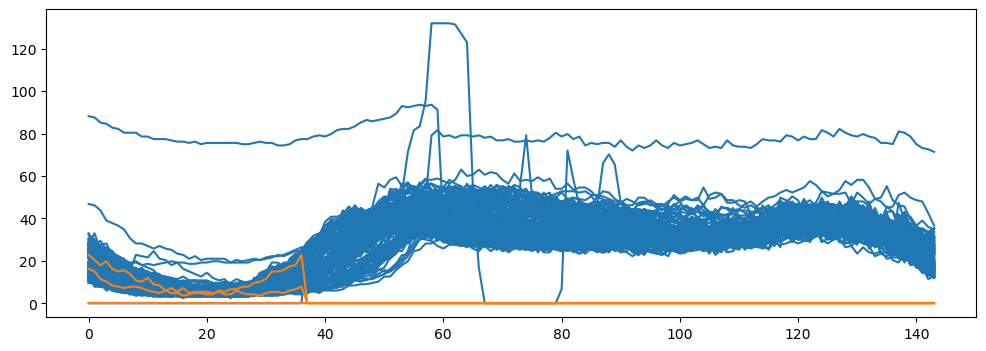

In [208]:
labels = tskmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

## moving average

In [209]:
df_s= df_cp.copy()

In [210]:
df_s['day'] = df_s['date'].dt.day
X = df_s.drop(['date','day'],axis=1).values
y = df_s.reset_index()['day'].map(lambda x:1 if x in [1,2,3,11,12,13,21,22,23] else 0).values


In [211]:
window_size = 5

X_smoothed = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        start_idx = max(0, j - window_size + 1)
        end_idx = j + 1
        X_smoothed[i,j] = np.mean(X[i, start_idx:end_idx])


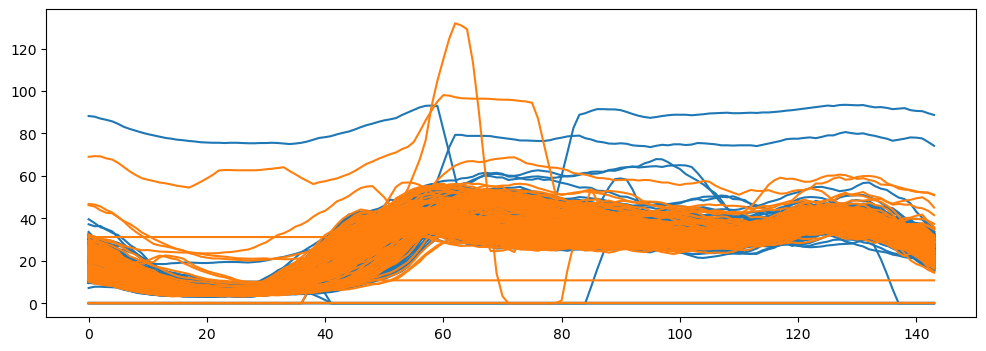

In [212]:
plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_smoothed[y == 0, :].T, '#1F77B4')
plt.plot(X_smoothed[y == 1, :].T, '#FF7F0E')
plt.show()

In [213]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65*N):].copy()
train_indices = shuffled_indices_[:int(0.65*N)].copy()

X_train, y_train = X_smoothed[train_indices, :], y[train_indices]
X_test, y_test = X_smoothed[test_indices, :], y[test_indices]

print( X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)




(423, 144) (423,)
(228, 144) (228,)


### MA k-means non-aggregated

0.22598600387573242


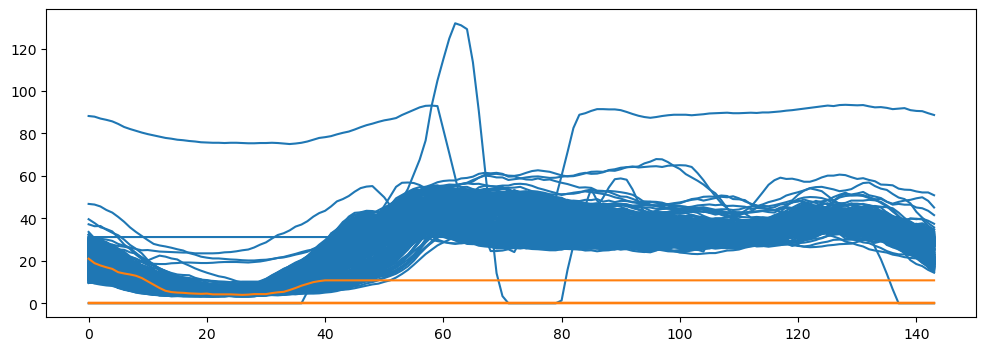

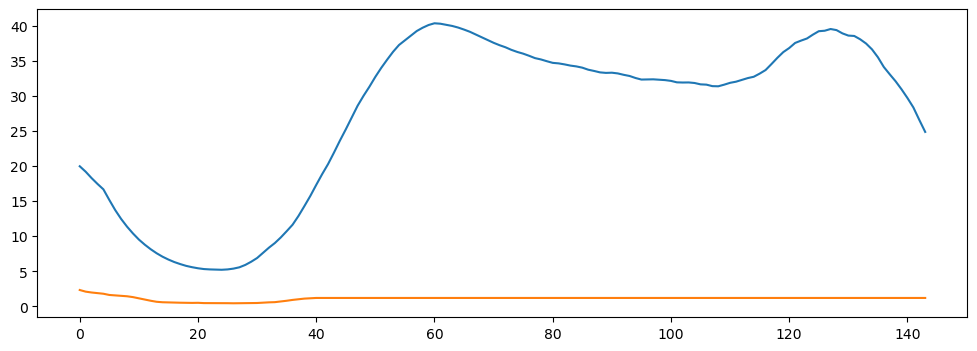

In [241]:
t = time.time()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(time.time() - t)

labels = kmeans.predict(X_train)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.show()

### MA DBA-k-means non-aggregated

552.5040922164917


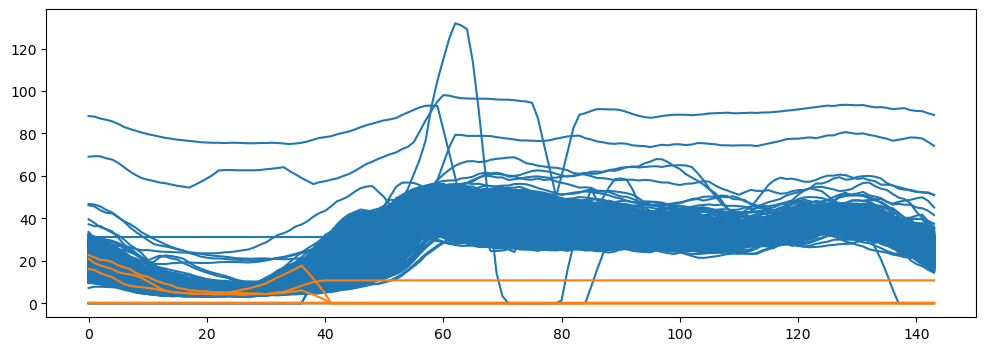

In [227]:
t = time.time()

tskmeans = TimeSeriesKMeans(n_clusters=2, metric='dtw', max_iter_barycenter=100, n_init=5)
tskmeans.fit(X_smoothed)

print(time.time() - t)

labels = tskmeans.predict(X_smoothed)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_smoothed[labels == 0, :].T, '#1F77B4')
plt.plot(X_smoothed[labels == 1, :].T, '#FF7F0E')
plt.show()

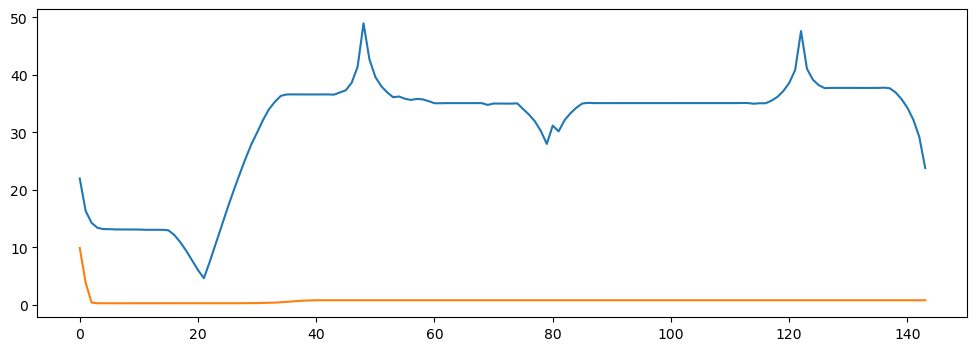

In [228]:
plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(tskmeans.cluster_centers_[0, :, 0].T, '#1F77B4')
plt.plot(tskmeans.cluster_centers_[1, :, 0].T, '#FF7F0E')
plt.show()

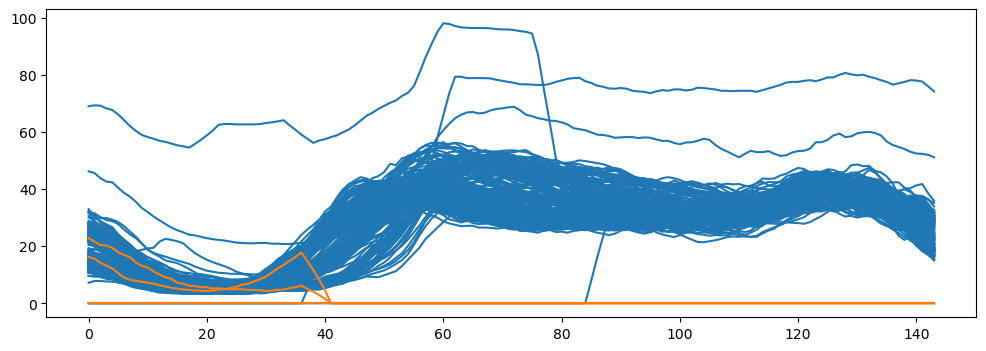

In [229]:
labels = tskmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()